# Dask
Dask is a parallel computing library in Python that is designed for scaling computations across multiple cores, processors, or even distributed systems (such as clusters of machines). It is especially useful when working with large datasets that cannot fit into memory all at once or when computational tasks are too large for a single machine.

**Key Features of Dask:**
1. Parallel Computing: Dask allows you to parallelize tasks on a single machine or across a distributed cluster. It breaks larger tasks into smaller chunks and schedules them for execution in parallel, optimizing resource usage.

2. Big Data Handling: It can work with datasets larger than memory by performing computations in a memory-efficient manner. This is especially useful for working with data that exceeds the RAM available on your machine.

3. Familiar API: Dask integrates with libraries like Pandas, NumPy, and Scikit-learn. Its APIs are designed to mimic those of these libraries, meaning you can apply many of the same operations (e.g., on DataFrames) that you would use in Pandas or NumPy, but with Dask, the computations are distributed.

4. Lazy Execution: Similar to Spark, Dask uses lazy execution. This means that operations on Dask objects (like dask.dataframe, dask.array, etc.) are not immediately computed. Instead, they build a task graph, and computations are only executed when explicitly triggered (e.g., by calling .compute()).

5. Task Scheduling: Dask has a flexible task scheduler that coordinates the execution of tasks across multiple workers. It offers:
    - Single Machine Scheduler: For parallel execution on your local machine.
    - Distributed Scheduler: For distributed execution across clusters of machines.

6. Scalability: Dask scales from small problems on your local machine to large problems on distributed clusters. It works well with cloud computing platforms (e.g., AWS, Google Cloud) and cluster managers (e.g., Kubernetes, YARN, SLURM).

In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

# Creating a Dask Object

In [2]:
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({"a":np.arange(2400), "b": list("abcaddbe" * 300)}, index = index)
# creating a dask dataframe from pandas data frame
ddf = dd.from_pandas(df, npartitions= 10) #The DataFrame is divided into 10 partitions each will handle part of the data.
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,string
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


In [3]:
ddf.compute()

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d
...,...,...
2021-12-09 19:00:00,2395,a
2021-12-09 20:00:00,2396,d
2021-12-09 21:00:00,2397,d
2021-12-09 22:00:00,2398,b


In [4]:
# To check the starting index for each partition
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

In [5]:
# access a particular partition
ddf.partitions[-1]

,a,b
npartitions=1,,
2021-11-30 00:00:00,int64,string
2021-12-09 23:00:00,...,...


# Indexing

In [6]:
ddf.a

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    int64
2021-09-11 00:00:00      ...
                       ...  
2021-11-30 00:00:00      ...
2021-12-09 23:00:00      ...
Dask Name: getitem, 2 expressions
Expr=df['a']

In [7]:
ddf["2021-09-01 00:00:00":"2021-11-01 00:03:00"]

,a,b
npartitions=7,,
2021-09-01 00:00:00.000000000,int64,string
2021-09-11 00:00:00.000000000,...,...
...,...,...
2021-10-31 00:00:00.000000000,...,...
2021-11-01 00:03:00.999999999,...,...


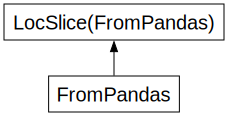

In [8]:
ddf["2021-09-01 00:00:00":"2021-11-01 00:03:00"].visualize()

In [9]:
ddf["2021-09-01 00:00:00":"2021-11-01 00:03:00"].compute()

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d
...,...,...
2021-10-31 20:00:00,1460,d
2021-10-31 21:00:00,1461,d
2021-10-31 22:00:00,1462,b
2021-10-31 23:00:00,1463,e


# Methods

In [10]:
ddf.a.mean()

<dask_expr.expr.Scalar: expr=df['a'].mean(), dtype=float64>

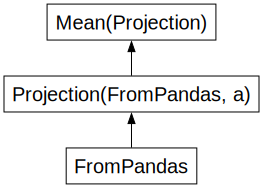

In [11]:
ddf.a.mean().visualize()

In [12]:
ddf.a.mean().compute()

np.float64(1199.5)

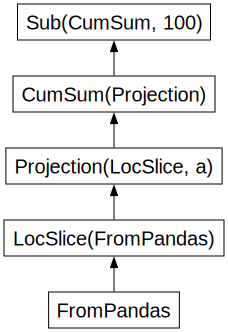

In [13]:
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result.visualize()

# Dask delayed
Dask delayed is an interface that can be used to **parallelize** existing Python code and custom algorithms **by delaying their execution**. Instead of immediately computing results, dask.delayed builds a task graph for your computations. Dask then computes this graph efficiently in parallel when you explicitly ask for the result using .compute()

In [14]:
from time import sleep
from dask import delayed

In [15]:
def inc(x):
    # Increments x by one
    sleep(1)
    return x + 1

def add(x, y):
    # Adds x and y
    sleep(1)
    return x + y

In [16]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: total: 0 ns
Wall time: 3 s


In [17]:
%%time
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)
z

CPU times: total: 0 ns
Wall time: 3.88 ms


Delayed('add-8606f9a4-f2fd-4796-b0f2-31d120a1f7a2')

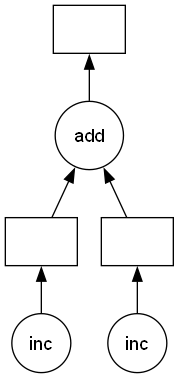

In [18]:
z.visualize()

In [19]:
%%time
z.compute()

CPU times: total: 0 ns
Wall time: 2 s


5

**Parallelizing a for-loop**

In [20]:
data = list(range(8))
data

[0, 1, 2, 3, 4, 5, 6, 7]

In [21]:
%%time
# Sequential code
results = []
for i in data:
    y = inc(i)         
    results.append(y)
    
total = sum(results)  
total

CPU times: total: 0 ns
Wall time: 8 s


36

CPU times: total: 0 ns
Wall time: 1.07 s


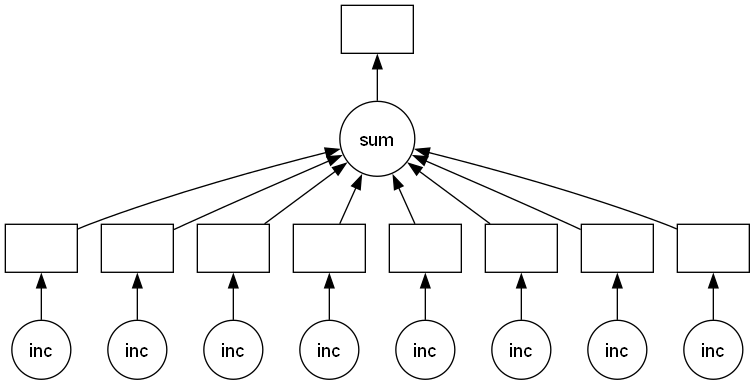

In [22]:
%%time
# both the inc and sum operations can be done in parallel,
# use delayed to parallelize the sequential code above.
results = []
for i in data:
    y = delayed(inc)(i)         
    results.append(y)
    
# total = sum(results)
total = delayed(sum)(results)  
total.visualize()


In [23]:
%%time
total.compute()

CPU times: total: 0 ns
Wall time: 1.01 s


36

# Dask DataFrame

In [134]:
import dask.dataframe as dd
# assume_missing=True, all integer columns that aren’t specified in dtype are assumed to contain missing values, and are converted to floats. Default is False.
ddf = dd.read_csv('Oil and Gas .csv',assume_missing=True)


In [135]:
ddf.head()


,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.599874,17.321973,1.374774
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.280064,18.257080,1.374774
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.853008,17.669975,1.374774
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.537882,17.236748,1.374774
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.420786,17.075768,1.374774


In [136]:
ddf.year.dtype

dtype('float64')

In [137]:
ddf[0].oil_price_nom = -0.87 
# Dask DataFrames are lazy and don’t support direct assignment the way Pandas does.

KeyError: 0

In [ ]:
ddf = ddf.assign(oil_price_nom=-0.87) #If you want to assign the value to only the first row, Dask does not support this type of in-place modification.
ddf.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.599874,17.321973,1.374774
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.280064,18.257080,1.374774
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.853008,17.669975,1.374774
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.537882,17.236748,1.374774
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.420786,17.075768,1.374774


In [138]:
ddf = dd.read_csv('Oil and Gas .csv',assume_missing=True)
pdf = ddf.compute()  # Convert Dask DataFrame to Pandas
pdf.loc[0, "oil_price_nom"] = -0.87  # Modify the first row
pdf

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.870000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.599874,17.321973,1.374774
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.280064,18.257080,1.374774
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.853008,17.669975,1.374774
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.537882,17.236748,1.374774
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716.0,ZWE,2010.0,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,0.0,0.0,0.0,0.0,12571454.0,NaN,1.0,0.789705,1.085666,1.374774
15517,Zimbabwe,716.0,ZWE,2011.0,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,0.0,0.0,0.0,0.0,12754378.0,NaN,1.0,0.765541,1.052445,1.374774
15518,Zimbabwe,716.0,ZWE,2012.0,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,0.0,0.0,0.0,0.0,13724317.0,NaN,1.0,0.750020,1.031107,1.374774
15519,Zimbabwe,716.0,ZWE,2013.0,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,0.0,NaN,NaN,NaN,14149648.0,NaN,1.0,0.739192,1.016222,1.374774


In [139]:
ddf = dd.from_pandas(pdf, npartitions=3)

In [140]:
ddf.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.599874,17.321973,1.374774
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.280064,18.257080,1.374774
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.853008,17.669975,1.374774
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.537882,17.236748,1.374774
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.420786,17.075768,1.374774


In [141]:
ddf.oil_price_nom.abs().compute()

0          0.870000
1          0.670000
2          1.000000
3          0.970000
4          1.090000
            ...    
15516     79.495534
15517    111.255598
15518    111.669702
15519    108.658518
15520     98.946008
Name: oil_price_nom, Length: 15521, dtype: float64

In [142]:
ddf.head() #note that it doesn't change the real value it has no inplace attribute

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.599874,17.321973,1.374774
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.280064,18.257080,1.374774
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.853008,17.669975,1.374774
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.537882,17.236748,1.374774
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.420786,17.075768,1.374774


In [143]:
# Adding oil_price_2000 and gas production into a single column
ddf['Total_Production'] = ddf['oil_price_2000'].add(ddf['gas_price_2000'], fill_value=0) #The fill_value in the add() method (as well as in other arithmetic operations like sub(), mul(), etc.) is used to specify a value to fill in for missing (NaN) data during the operation.
ddf['Total_Production'].compute()

0        10.860860
1         8.815239
2        12.715790
3        12.039690
4        13.383210
           ...    
15516    66.315932
15517    88.194595
15518    85.749518
15519    83.059930
15520    75.135103
Name: Total_Production, Length: 15521, dtype: float64

In [144]:
ddf.columns #it added Total_Production column

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014', 'Total_Production'],
      dtype='object')

In [145]:
ddf[['oil_price_2000', 'gas_price_2000']].all().compute()

oil_price_2000    True
gas_price_2000    True
dtype: bool

In [146]:
ddf[['oil_price_2000', 'gas_price_2000']].all(axis = 1).compute()

0        True
1        True
2        True
3        True
4        True
         ... 
15516    True
15517    True
15518    True
15519    True
15520    True
Length: 15521, dtype: bool

In [147]:
# Returns True if all element is true, optionally over an axis.
ddf[['oil_value_nom', 'gas_price_2000']].all().compute()

oil_value_nom     False
gas_price_2000     True
dtype: bool

In [148]:
# Returns True if any element is true, optionally over an axis.
ddf[['oil_value_nom', 'gas_price_2000']].any().compute()

oil_value_nom     True
gas_price_2000    True
dtype: bool

Dask needs to infer the structure of the DataFrame (the "meta") before computation begins. Dask operates lazily, and to handle large computations efficiently, it requires a meta argument for certain operations, which tells Dask what the resulting DataFrame/Series will look like after applying a function.

In Dask, meta is a small (typically empty) Pandas object (DataFrame, Series, or scalar) that describes the structure and types of the final output of a Dask operation. It helps Dask plan its computations by knowing what kind of object to expect (column names, data types, etc.) before actually performing the heavy computation.


In [149]:
# convert gas_price_2000_mboe unit
fun = lambda x: x / 1000
# #######understand what is meta
ddf['conerted_gas_price_2000_mboe'] = ddf['gas_price_2000_mboe'].apply(fun, meta=('gas_price_2000_mboe', 'f8'))
ddf.loc[35:40].compute()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe
35,Afghanistan,4.0,AFG,1967.0,Afghanistan,0.0,9.161955,1.80,0.0,0.0,...,NaN,NaN,10221902.0,11537966.0,1.0,5.153946,7.085508,1.374774,12.053875,15656.296569
36,Afghanistan,4.0,AFG,1968.0,Afghanistan,0.0,8.797903,1.80,0.0,0.0,...,NaN,NaN,10465770.0,11825320.0,1.0,4.947306,6.801425,1.374774,11.560333,14955.265637
37,Afghanistan,4.0,AFG,1969.0,Afghanistan,0.0,8.347174,1.80,0.0,0.0,...,NaN,NaN,10729191.0,12122740.0,1.0,4.694172,6.453423,1.374774,11.152767,15188.938807
38,Afghanistan,4.0,AFG,1970.0,Afghanistan,0.0,7.879107,1.80,0.0,0.0,...,NaN,NaN,11015621.0,12430623.0,1.0,4.432428,6.093585,1.374774,10.531460,14359.329952
39,Afghanistan,4.0,AFG,1971.0,Afghanistan,0.0,9.413323,2.24,0.0,0.0,...,NaN,NaN,11323446.0,12749385.0,1.0,4.246452,5.837910,1.374774,12.002747,14018.642717
40,Afghanistan,4.0,AFG,1972.0,Afghanistan,0.0,10.089420,2.48,0.0,0.0,...,NaN,NaN,11644377.0,13079460.0,1.0,4.117302,5.660358,1.374774,12.599993,13591.757161


In [150]:
# Adds or modifies new columns.
ddf = ddf.assign(conerted_gas_price_2000_mboe=lambda x: x['gas_price_2000_mboe']*1000, )
ddf.loc[35:40].compute()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe
35,Afghanistan,4.0,AFG,1967.0,Afghanistan,0.0,9.161955,1.80,0.0,0.0,...,NaN,NaN,10221902.0,11537966.0,1.0,5.153946,7.085508,1.374774,12.053875,1.565630e+10
36,Afghanistan,4.0,AFG,1968.0,Afghanistan,0.0,8.797903,1.80,0.0,0.0,...,NaN,NaN,10465770.0,11825320.0,1.0,4.947306,6.801425,1.374774,11.560333,1.495527e+10
37,Afghanistan,4.0,AFG,1969.0,Afghanistan,0.0,8.347174,1.80,0.0,0.0,...,NaN,NaN,10729191.0,12122740.0,1.0,4.694172,6.453423,1.374774,11.152767,1.518894e+10
38,Afghanistan,4.0,AFG,1970.0,Afghanistan,0.0,7.879107,1.80,0.0,0.0,...,NaN,NaN,11015621.0,12430623.0,1.0,4.432428,6.093585,1.374774,10.531460,1.435933e+10
39,Afghanistan,4.0,AFG,1971.0,Afghanistan,0.0,9.413323,2.24,0.0,0.0,...,NaN,NaN,11323446.0,12749385.0,1.0,4.246452,5.837910,1.374774,12.002747,1.401864e+10
40,Afghanistan,4.0,AFG,1972.0,Afghanistan,0.0,10.089420,2.48,0.0,0.0,...,NaN,NaN,11644377.0,13079460.0,1.0,4.117302,5.660358,1.374774,12.599993,1.359176e+10


In [151]:
ddf.year.astype( 'int64').compute()


0        1932
1        1933
2        1934
3        1935
4        1936
         ... 
15516    2010
15517    2011
15518    2012
15519    2013
15520    2014
Name: year, Length: 15521, dtype: int64

In [152]:
ddf.loc[22:32, ["gas_price_2000_mboe","gas_prod55_14"]].compute()

,gas_price_2000_mboe,gas_prod55_14
22,0.000000e+00,NaN
23,1.238483e+07,NaN
24,1.331953e+07,NaN
25,1.285218e+07,NaN
26,1.378688e+07,NaN
27,1.472159e+07,NaN
28,1.565630e+07,0.0
29,1.635732e+07,0.0
30,1.729203e+07,0.0
31,1.705835e+07,0.0


In [153]:
# Fills NA/NaN values using the next valid observation (backward fill).
ddf['bla']= ddf['gas_prod55_14'].bfill().compute()
ddf.loc[22:32, ["bla"]].compute()

,bla
22,0.0
23,0.0
24,0.0
25,0.0
26,0.0
27,0.0
28,0.0
29,0.0
30,0.0
31,0.0


In [154]:
# Computes pairwise correlation of columns.
corr_matrix = ddf[['oil_price_2000', 'gas_price_2000', 'gas_price_2000_mboe']].corr()
corr_matrix.compute()

,oil_price_2000,gas_price_2000,gas_price_2000_mboe
oil_price_2000,1.000000,0.496845,0.604427
gas_price_2000,0.496845,1.000000,1.000000
gas_price_2000_mboe,0.604427,1.000000,1.000000


In [155]:
# Counts non-NA/null cells for each column or row.
ddf.count().compute()



cty_name                        15521
iso3numeric                     15521
id                              15106
year                            15521
eiacty                          14254
oil_prod32_14                   10103
oil_price_2000                  15503
oil_price_nom                   15521
oil_value_nom                   10103
oil_value_2000                  10103
oil_value_2014                  10103
gas_prod55_14                    8812
gas_price_2000_mboe             15521
gas_price_2000                  11220
gas_price_nom                   15521
gas_value_nom                    8812
gas_value_2000                   8812
gas_value_2014                   8812
oil_gas_value_nom               10234
oil_gas_value_2000              10234
oil_gas_value_2014              10234
oil_gas_valuePOP_nom            10072
oil_gas_valuePOP_2000           10072
oil_gas_valuePOP_2014           10072
oil_exports                      4510
net_oil_exports                  4510
net_oil_expo

In [156]:
# Computes pairwise covariance of columns.
covariance = ddf[['oil_price_2000', 'gas_price_2000']].cov()
covariance.compute()

,oil_price_2000,gas_price_2000
oil_price_2000,460.525985,16.784271
gas_price_2000,16.784271,2.167255


In [157]:
# Returns cumulative maximum over a DataFrame or Series axis.
ddf['cummax_oil'] = ddf['oil_price_2000'].cummax() #same as cummmin cumprod cumsum
ddf.head()



,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe,bla,cummax_oil
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.87,NaN,NaN,...,NaN,NaN,1.0,12.599874,17.321973,1.374774,10.860860,0.0,0.0,10.86086
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,1.0,13.280064,18.257080,1.374774,8.815239,0.0,0.0,10.86086
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,1.0,12.853008,17.669975,1.374774,12.715790,0.0,0.0,12.71579
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,1.0,12.537882,17.236748,1.374774,12.039690,0.0,0.0,12.71579
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,1.0,12.420786,17.075768,1.374774,13.383210,0.0,0.0,13.38321


In [158]:
# Compute the difference in gas price between consecutive rows
ddf['gas_price_2000'].diff().compute()


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
15516    0.412862
15517   -0.513994
15518   -1.028834
15519    0.745348
15520    0.422115
Name: gas_price_2000, Length: 15521, dtype: float64

In [166]:
# Drop the 'cummax_oil' column
ddf = ddf.drop(columns='cummax_oil')
ddf.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe,bla
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.87,NaN,NaN,...,NaN,NaN,NaN,1.0,12.599874,17.321973,1.374774,10.860860,0.0,0.0
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,1.0,13.280064,18.257080,1.374774,8.815239,0.0,0.0
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,1.0,12.853008,17.669975,1.374774,12.715790,0.0,0.0
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,1.0,12.537882,17.236748,1.374774,12.039690,0.0,0.0
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,1.0,12.420786,17.075768,1.374774,13.383210,0.0,0.0


In [167]:
type(ddf)

dask_expr._collection.DataFrame

In [171]:
ddf.describe

<bound method DataFrame.describe of Dask DataFrame Structure:
              cty_name iso3numeric      id     year  eiacty oil_prod32_14 oil_price_2000 oil_price_nom oil_value_nom oil_value_2000 oil_value_2014 gas_prod55_14 gas_price_2000_mboe gas_price_2000 gas_price_nom gas_value_nom gas_value_2000 gas_value_2014 oil_gas_value_nom oil_gas_value_2000 oil_gas_value_2014 oil_gas_valuePOP_nom oil_gas_valuePOP_2000 oil_gas_valuePOP_2014 oil_exports net_oil_exports net_oil_exports_mt net_oil_exports_value net_oil_exports_valuePOP gas_exports net_gas_exports_bcf net_gas_exports_mboe net_gas_exports_value net_gas_exports_valuePOP net_oil_gas_exports_valuePOP population pop_maddison sovereign mult_nom_2000 mult_nom_2014 mult_2000_2014 Total_Production conerted_gas_price_2000_mboe      bla
npartitions=3                                                                                                                                                                                                   

In [173]:
# Drop duplicate rows based on 'Well_ID'
ddf.drop_duplicates(subset='cty_name').compute()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe,bla
83,Albania,8.0,ALB,1932.0,Albania,NaN,10.86086,0.87,NaN,NaN,...,NaN,993000.0,993000.0,1.0,12.599874,17.321973,1.374774,10.86086,0.0,0.000000
498,Australia,36.0,AUS,1932.0,Australia,NaN,10.86086,0.87,NaN,NaN,...,NaN,6579000.0,6579000.0,1.0,12.599874,17.321973,1.374774,10.86086,0.0,0.000000
830,Bahrain,48.0,BHR,1932.0,Bahrain,NaN,10.86086,0.87,NaN,NaN,...,NaN,NaN,NaN,0.0,12.599874,17.321973,1.374774,10.86086,0.0,0.341198
913,Bangladesh,50.0,BGD,1932.0,Bangladesh,NaN,10.86086,0.87,NaN,NaN,...,NaN,NaN,NaN,0.0,12.599874,17.321973,1.374774,10.86086,0.0,3.081197
1245,Belize,84.0,BLZ,1932.0,Belize,NaN,10.86086,0.87,NaN,NaN,...,NaN,NaN,NaN,0.0,12.599874,17.321973,1.374774,10.86086,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14193,Turkmenistan,795.0,TKM,1932.0,Turkmenistan,NaN,10.86086,0.87,NaN,NaN,...,NaN,NaN,NaN,0.0,12.599874,17.321973,1.374774,10.86086,0.0,502.111500
14276,Uganda,800.0,UGA,1932.0,Uganda,NaN,10.86086,0.87,NaN,NaN,...,NaN,NaN,NaN,0.0,12.599874,17.321973,1.374774,10.86086,0.0,0.000000
14442,United Arab Emirates,784.0,ARE,1932.0,United Arab Emirates,NaN,10.86086,0.87,NaN,NaN,...,NaN,NaN,NaN,0.0,12.599874,17.321973,1.374774,10.86086,0.0,4.012421
14691,Uruguay,858.0,URY,1932.0,Uruguay,NaN,10.86086,0.87,NaN,NaN,...,NaN,1770000.0,1770000.0,1.0,12.599874,17.321973,1.374774,10.86086,0.0,0.000000


In [176]:
# Drop rows where both 'gas_price_2000_mboe' and 'oil_prod32_14' are NaN
ddf.dropna(subset=['gas_price_2000_mboe', 'oil_prod32_14'], how='any').compute()


,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe,bla
28,Afghanistan,4.0,AFG,1960.0,Afghanistan,0.0,10.912870,1.900000,0.0,0.0,...,NaN,8774440.0,9829450.0,1.0,5.808306,7.985105,1.374774,13.804790,1.565630e+10,0.0
29,Afghanistan,4.0,AFG,1961.0,Afghanistan,0.0,10.236770,1.800000,0.0,0.0,...,NaN,8953544.0,10043473.0,1.0,5.751480,7.906982,1.374774,13.258178,1.635732e+10,0.0
30,Afghanistan,4.0,AFG,1962.0,Afghanistan,0.0,10.124090,1.800000,0.0,0.0,...,NaN,9141783.0,10267083.0,1.0,5.689488,7.821757,1.374774,13.318150,1.729203e+10,0.0
31,Afghanistan,4.0,AFG,1963.0,Afghanistan,0.0,9.994071,1.800000,0.0,0.0,...,NaN,9339507.0,10500711.0,1.0,5.622330,7.729430,1.374774,13.144969,1.705835e+10,0.0
32,Afghanistan,4.0,AFG,1964.0,Afghanistan,0.0,9.864053,1.800000,0.0,0.0,...,NaN,9547131.0,10744167.0,1.0,5.544840,7.622899,1.374774,12.799135,1.588997e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716.0,ZWE,2010.0,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,0.0,12571454.0,NaN,1.0,0.789705,1.085666,1.374774,66.315932,1.915340e+10,0.0
15517,Zimbabwe,716.0,ZWE,2011.0,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,0.0,12754378.0,NaN,1.0,0.765541,1.052445,1.374774,88.194595,1.637074e+10,0.0
15518,Zimbabwe,716.0,ZWE,2012.0,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,0.0,13724317.0,NaN,1.0,0.750020,1.031107,1.374774,85.749518,1.080083e+10,0.0
15519,Zimbabwe,716.0,ZWE,2013.0,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,NaN,14149648.0,NaN,1.0,0.739192,1.016222,1.374774,83.059930,1.483600e+10,0.0


In [177]:
# Check where oil production equals gas production
ddf['is_equal'] = ddf['oil_gas_value_2014'].eq(ddf['oil_gas_value_2014'])
ddf.compute()


,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014,Total_Production,conerted_gas_price_2000_mboe,bla,is_equal
0,Afghanistan,4.0,AFG,1932.0,Afghanistan,NaN,10.860860,-0.870000,NaN,NaN,...,NaN,NaN,1.0,12.599874,17.321973,1.374774,10.860860,0.000000e+00,0.0,False
1,Afghanistan,4.0,AFG,1933.0,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,...,NaN,NaN,1.0,13.280064,18.257080,1.374774,8.815239,0.000000e+00,0.0,False
2,Afghanistan,4.0,AFG,1934.0,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,...,NaN,NaN,1.0,12.853008,17.669975,1.374774,12.715790,0.000000e+00,0.0,False
3,Afghanistan,4.0,AFG,1935.0,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,...,NaN,NaN,1.0,12.537882,17.236748,1.374774,12.039690,0.000000e+00,0.0,False
4,Afghanistan,4.0,AFG,1936.0,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,...,NaN,NaN,1.0,12.420786,17.075768,1.374774,13.383210,0.000000e+00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716.0,ZWE,2010.0,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,12571454.0,NaN,1.0,0.789705,1.085666,1.374774,66.315932,1.915340e+10,0.0,True
15517,Zimbabwe,716.0,ZWE,2011.0,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,12754378.0,NaN,1.0,0.765541,1.052445,1.374774,88.194595,1.637074e+10,0.0,True
15518,Zimbabwe,716.0,ZWE,2012.0,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,13724317.0,NaN,1.0,0.750020,1.031107,1.374774,85.749518,1.080083e+10,0.0,True
15519,Zimbabwe,716.0,ZWE,2013.0,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,14149648.0,NaN,1.0,0.739192,1.016222,1.374774,83.059930,1.483600e+10,0.0,True
